# Problem Statement:

- Lack of visibility on business-main metrics hindering insights and decision-making for managers.
- Need to establish a clear understanding of the purpose and goals of data manipulation and analysis.
- Formulating specific questions to guide the analysis process.
- Questions include trip frequency, completion and cancellation rates, drop-off locations, preferred product types, average fare, distance, amount, and time spent on rides, weekday fare averages, longest/shortest and most/least expensive rides, and average lead time before initiating a trip.
- The questions serve as a guide but do not encompass the entire analysis.
- The need, intention, and pain associated with the lack of visibility on business-main metrics need to be articulated (the "WHAT" question).
- Understanding the purpose and goals behind addressing this problem is crucial (the "WHY" question).
- Determining the appropriate tools and approaches to solve the problem (the "HOW" question).
- Clear comprehension of the problem and purpose is essential before proceeding with further analysis steps.

### 1. Importing libraries and dataset.

In [1]:
import pandas as pd
import numpy as np

# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rides = pd.read_csv('trips_data.csv')

In [2]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  568 non-null    object 
 1   Product Type          482 non-null    object 
 2   Trip or Order Status  568 non-null    object 
 3   Request Time          568 non-null    object 
 4   Begin Trip Time       568 non-null    object 
 5   Begin Trip Lat        274 non-null    float64
 6   Begin Trip Lng        274 non-null    float64
 7   Begin Trip Address    274 non-null    object 
 8   Dropoff Time          568 non-null    object 
 9   Dropoff Lat           274 non-null    float64
 10  Dropoff Lng           274 non-null    float64
 11  Dropoff Address       274 non-null    object 
 12  Distance (miles)      568 non-null    float64
 13  Fare Amount           568 non-null    float64
 14  Fare Currency         568 non-null    object 
dtypes: float64(6), object(9

In [3]:
rides.rename(columns={'Trip or Order Status': 'status', 'Request Time': 'request_time','Product Type':'product_type','Begin Trip Time':'begin_time',
                      'Begin Trip Lat':'begin_lat','Begin Trip Lng':'begin_lng','Dropoff Time':'dropoff_time','Dropoff Lat':'dropoff_lat',
                      'Dropoff Lng':'dropoff_lng','Distance (miles)':'distance_miles','Fare Amount':'fare_amount',
                      'Fare Currency':'fare_currency','City':'city'}, inplace=True)

In [4]:
rides.head()

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_lng,Dropoff Address,distance_miles,fare_amount,fare_currency
0,Pune,UberAuto,COMPLETED,2022-04-25 08:57:35 +0000 UTC,2022-04-25 09:02:35 +0000 UTC,18.541298,73.727295,Symbiosis International University Near Lupin ...,2022-04-25 09:19:05 +0000 UTC,18.552439,73.76978,"Yash Orchid, Yash Orchid Private Road, Mohan N...",4.09,95.4,INR
1,Pune,UberAuto,CANCELED,2022-04-25 04:52:14 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.00,0.0,INR
2,Pune,NaN,UNFULFILLED,2022-04-22 12:58:17 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.00,0.0,INR
3,Pune,NaN,UNFULFILLED,2022-04-22 12:51:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.00,0.0,INR
4,Pune,NaN,UNFULFILLED,2022-04-22 12:46:59 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.00,0.0,INR


                count  mean   std  min  25%  50%   75%    max
distance_miles  568.0   1.3   2.5  0.0  0.0  0.0   1.3   15.4
fare_amount     568.0  33.0  62.5  0.0  0.0  0.0  35.7  376.3


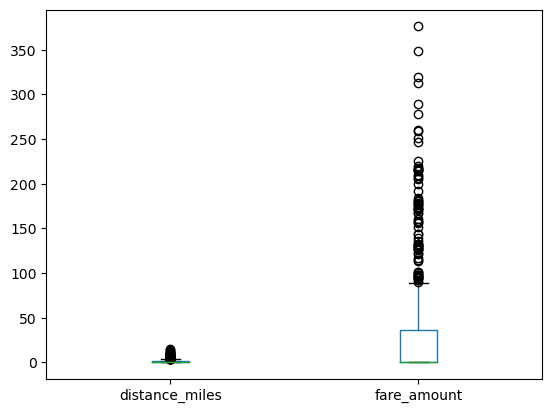

In [5]:
#creating an additional dataframe without Uber EATS records (out of analysis scope)
df1 = rides[rides.product_type!='UberEATS Marketplace'][['distance_miles','fare_amount']]

print(df1.describe().transpose().round(1));
df1.boxplot(grid=False);

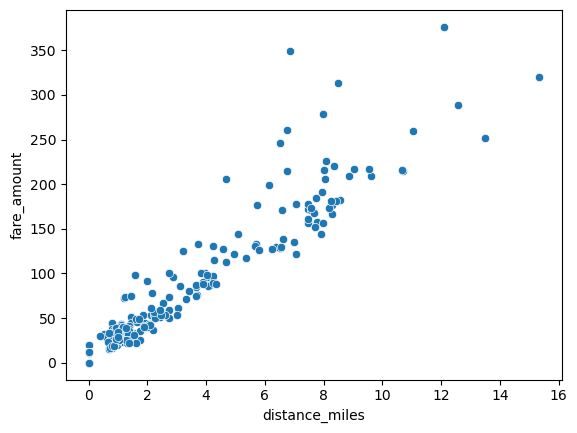

In [6]:
sns.scatterplot(x='distance_miles',y='fare_amount',data=df1);

### 2.Data Preparation

In [7]:
rides.pop('fare_currency');

In [8]:
rides.isnull().sum().sort_values(ascending=False)

begin_lat             294
begin_lng             294
Begin Trip Address    294
dropoff_lat           294
dropoff_lng           294
Dropoff Address       294
product_type           86
city                    0
status                  0
request_time            0
begin_time              0
dropoff_time            0
distance_miles          0
fare_amount             0
dtype: int64

In [9]:
rides[rides.product_type.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_lng,Dropoff Address,distance_miles,fare_amount
2,Pune,NaN,UNFULFILLED,2022-04-22 12:58:17 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0
3,Pune,NaN,UNFULFILLED,2022-04-22 12:51:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0
4,Pune,NaN,UNFULFILLED,2022-04-22 12:46:59 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0
5,Pune,NaN,UNFULFILLED,2022-04-22 09:23:26 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0
7,Pune,NaN,UNFULFILLED,2022-04-22 08:08:53 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,Pune,NaN,UNFULFILLED,2019-07-20 08:23:55 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0
549,Pune,NaN,UNFULFILLED,2019-07-15 10:27:05 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0
550,Pune,NaN,UNFULFILLED,2019-07-12 08:57:17 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0
554,Pune,NaN,UNFULFILLED,2019-07-07 05:13:29 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0


In [10]:
rides.dropna(subset = ['product_type'], inplace=True)

#### 2.1 Data Cleansing: Categorical features

In [11]:
# Checking categories in product_type column
print(rides.product_type.value_counts())

# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}

# New categories replacement
rides['product_type'].replace(product_mapping, inplace=True)

# Checking new categories in product_type column
print(rides.product_type.value_counts())

UberAuto          405
UberGo             69
UberGo Rentals      5
Go Sedan            2
Premier             1
Name: product_type, dtype: int64
UberAuto          405
UberGo             69
UberGo Rentals      5
Go Sedan            2
Premier             1
Name: product_type, dtype: int64


In [12]:
rides = rides[rides.product_type!='UberEATS Marketplace']

In [13]:
rides.status.value_counts()

CANCELED           262
COMPLETED          203
DRIVER_CANCELED     17
Name: status, dtype: int64

#### 2.2 Data Transformation: Handling dates

In [14]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def date_convertion(df, cols):

  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
    
  return df

# Applying date_convertion function to date features 
rides = date_convertion(rides, ['request_time', 'begin_time', 'dropoff_time'])

In [15]:
rides['year'] = rides.request_time.map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides.request_time.map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides.request_time.map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))

#### 2.3 Feature Engineering: Creating new features

In [16]:
rides['distance_km'] = round(rides.distance_miles*1.60934,2)
rides['amount_km'] = round(rides.fare_amount/rides.distance_km,2)

In [17]:
rides['request_lead_time'] = rides.begin_time - rides.request_time
rides['request_lead_time'] = rides['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

In [18]:
rides['trip_duration'] = rides.dropoff_time - rides.begin_time
rides['trip_duration'] = rides['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

In [19]:
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'amount_km']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),['begin_time','dropoff_time']]= np.nan

### 3. Data Analysis & Storytelling: It’s show time!

In [20]:
completed_rides = rides[(rides.status!='CANCELED')&(rides.status!='DRIVER_CANCELED')] 

#### a. How many trips have I done over the years?

Total trips:  203
2019    49
2020    35
2021    72
2022    47
Name: year, dtype: int64


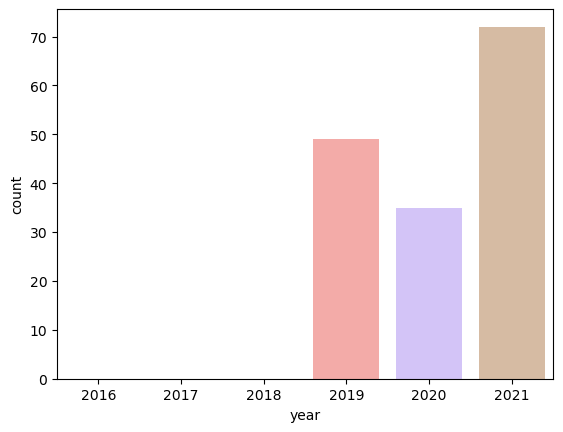

In [21]:
print('Total trips: ', completed_rides.status.count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel');

#### b. How many trips were completed or canceled?

Total trips:  482
CANCELED           54.4
COMPLETED          42.1
DRIVER_CANCELED     3.5
Name: status, dtype: float64


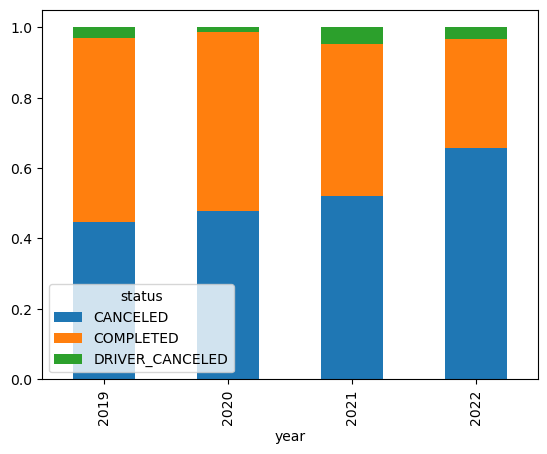

In [23]:
print('Total trips: ', rides.status.count())
print(round(rides.status.value_counts()/rides.status.size*100,1))

#sns.countplot(data=rides, x='year', order=['2015','2016','2017','2018','2019','2020','2021'], hue='status', palette='pastel');
rides.groupby(by=['year'])['status'].value_counts(normalize=True).unstack('status').plot.bar(stacked=True);

#### c. Where did most of the dropoffs occur?

In [24]:
import folium
from folium import plugins

coord=[]
for lat,lng in zip(completed_rides.dropoff_lat.values,completed_rides.dropoff_lng.values):
  coord.append([lat,lng])

map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)

map.add_child(plugins.HeatMap(coord))
        
map

#### d. What product type was usually chosen?

          Total Rides     %
UberGo             50  24.6
UberAuto          153  75.4


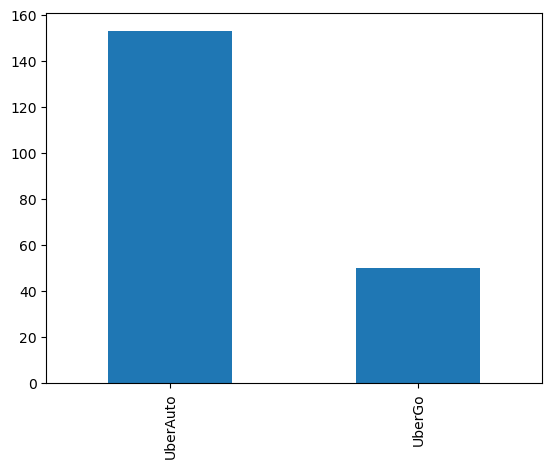

In [25]:
# Creating a serie with product types count
pt_rides = pd.Series(completed_rides.product_type.value_counts().sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_rides)
# Including new column with trips portion
df['%'] = (completed_rides.product_type.value_counts().sort_index(ascending=False)/completed_rides.product_type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Rides'}, inplace=True)
print(df)
# Plotting product types count
completed_rides['product_type'].value_counts().plot(kind='bar');

#### e. What was the average fare, distance, amount, and time spent on rides?

In [26]:
print('Avg. fare:', round(completed_rides.fare_amount.mean(),1),'BRL')
print('Avg. distance:',round(completed_rides.distance_km.mean(),1),'km')
print('Avg. fare/km:',round(completed_rides.fare_amount.sum()/completed_rides.distance_km.sum(),1),'BRL/km')
print('Avg. time spent on trips:',round(completed_rides.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_rides.fare_amount.sum(),1),'BRL')
print('Total distance:',round(completed_rides.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_rides.trip_duration.sum()/60,1),'hours')

Avg. fare: 91.3 BRL
Avg. distance: 5.9 km
Avg. fare/km: 15.6 BRL/km
Avg. time spent on trips: 15.1 minutes

Total fare amount: 18533.4 BRL
Total distance: 1188.9 km
Total time spent on trips: 51.2 hours


#### f. Which weekdays had the highest average fares per km ridden?

In [27]:
#overlapping pivot tables to get weighted average
amount_table = completed_rides.pivot_table(values='fare_amount',aggfunc='sum',columns='weekday', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table = amount_table.reindex(column_order, axis=1)

distance_table = completed_rides.pivot_table(values='distance_km',aggfunc='sum',columns='weekday', index='year').round(1)
distance_table = distance_table.reindex(column_order, axis=1)

(amount_table/distance_table).round(1)

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2019,15.5,15.1,13.1,17.5,19.8,13.3,19.6
2020,13.8,15.6,14.6,15.3,18.8,18.0,13.8
2021,15.6,14.7,17.0,17.5,17.1,15.3,15.1
2022,15.2,14.2,15.3,15.3,15.9,13.6,14.6


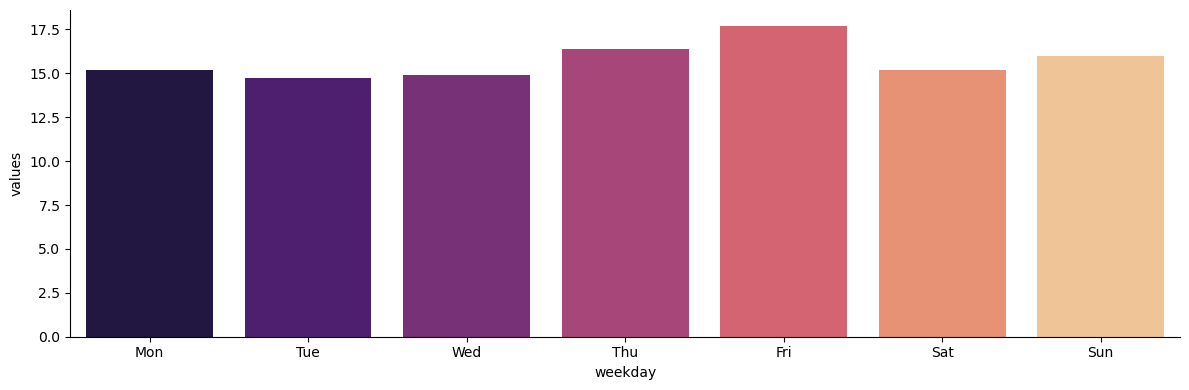

In [28]:
#creating an auxiliar data frame to be displayed in category plot 
aux_serie = round((completed_rides.groupby('weekday')['fare_amount'].sum()/completed_rides.groupby('weekday')['distance_km'].sum()),2)                                                                                                                              
amount_km_df = pd.DataFrame(aux_serie)

amount_km_df = amount_km_df.reset_index()
amount_km_df.rename(columns={'weekday':'weekday',0:'values'},inplace=True)

sns.catplot(x='weekday', y='values', data=amount_km_df, kind='bar', height=4, aspect=3, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='magma');

#### g. Which was the longest/shortest and more expensive/cheaper ride?

In [30]:
rides_distance = completed_rides[completed_rides.distance_km == completed_rides.distance_km.max()]
rides_distance = pd.concat([rides_distance, completed_rides[completed_rides.distance_km == completed_rides.distance_km.min()]])
rides_distance

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,Begin Trip Address,dropoff_time,dropoff_lat,...,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
396,Pune,UberGo,COMPLETED,2020-02-10 04:57:49,2020-02-10 05:06:59,18.541210,73.727375,"College Entrance, Maharashtra 412115, India",2020-02-10 05:47:47,18.661324,...,15.35,319.81,2020,Feb,Mon,04:57,24.70,12.95,9.2,40.8
450,Pune,UberAuto,COMPLETED,2020-01-02 11:57:06,2020-01-02 12:05:07,18.576622,73.773511,"44, SR NO.44/12/1, Radha Krishna Hostel, Newar...",2020-01-02 12:07:56,18.573815,...,0.38,30.44,2020,Jan,Thu,11:57,0.61,49.90,8.0,2.8


In [33]:
rides_amount_km = completed_rides[completed_rides.amount_km==completed_rides.amount_km.max()]
rides_amount_km = pd.concat([completed_rides[completed_rides.amount_km == completed_rides.amount_km.max()],
                             completed_rides[completed_rides.amount_km == completed_rides.amount_km.min()]])
rides_amount_km

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,Begin Trip Address,dropoff_time,dropoff_lat,...,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
450,Pune,UberAuto,COMPLETED,2020-01-02 11:57:06,2020-01-02 12:05:07,18.576622,73.773511,"44, SR NO.44/12/1, Radha Krishna Hostel, Newar...",2020-01-02 12:07:56,18.573815,...,0.38,30.44,2020,Jan,Thu,11:57,0.61,49.90,8.0,2.8
465,Pune,UberAuto,COMPLETED,2019-12-17 09:43:47,2019-12-17 09:50:49,18.566668,73.769441,"Veerbhadra Nagar, Baner, Pune, Maharashtra 411...",2019-12-17 09:58:39,18.576713,...,1.62,22.34,2019,Dec,Tue,09:43,2.61,8.56,7.0,7.8


#### h. What was the average lead time before beginning a trip?

In [34]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

8.4 minutes


### 4. Conclusion 

1. Exploratory Data Analysis (EDA) is a non-trivial task that requires significant effort and patience.
2. EDA can be a powerful tool for businesses when applied correctly.
3. This post provided tips and steps to make the analysis process easier.
4. It emphasized the importance of defining a clear business problem to guide coding efforts and achieve specific objectives.
5. The post highlighted the significance of uncovering important insights through EDA.
6. It showcased a practical application of Python in daily business activities, highlighting its value and interest.
7. Overall, the post underscored the potential and importance of effectively using EDA in a business context.